In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load your dataset
# For demonstration, let's create a synthetic dataset
# In practice, you would load your data from a CSV or or database
idx = 100
data = {
    'Temperature': np.random.uniform(250, 230, idx ), # Kelvin
    'Concentration': np.random.uniform(0.1, 1.0, idx), # Molarity
    'Pressure': np.random.uniform(1, 10, idx), # atm
    'ReactionRate': np.random.uniform(0.01, 0.5, idx) # M/s
}

df = pd.DataFrame(data)
df.head()


,Temperature,Concentration,Pressure,ReactionRate
0,230.107385,0.271099,4.354445,0.217534
1,244.323800,0.900304,3.843801,0.134911
2,234.524874,0.599705,9.373462,0.099069
3,243.746340,0.845598,7.683984,0.351753
4,232.899916,0.386751,8.714735,0.207074


In [2]:
# Split the data into features and target variable
x = df[['Temperature', 'Concentration', 'Pressure']]
y = df['ReactionRate']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=idx, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.13090558499767535
R-squared: -0.3939660498386621


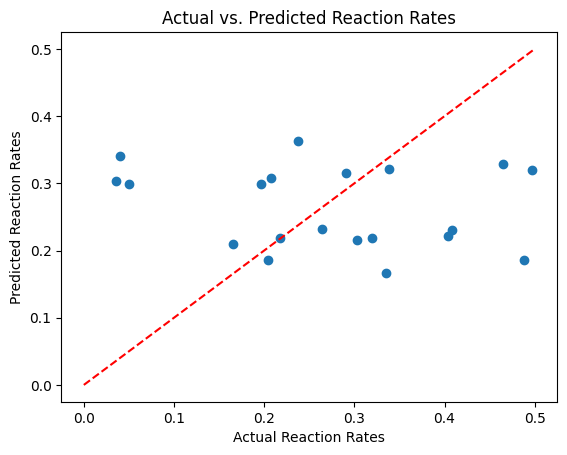

In [3]:
# Visualize the Results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Reaction Rates')
plt.ylabel('Predicted Reaction Rates')
plt.title('Actual vs. Predicted Reaction Rates')
plt.plot([0, 0.5], [0, 0.5], 'r--')     # Line of perfect prediction
plt.show()